In [1]:
# Dependencies
import numpy as np
import pandas as pd

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [2]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [3]:
# Create our session (link) from Python to the DB
session = Session(engine)

## D1: Determine the Summary Statistics for June

In [4]:
# Import the sqlalchemy extract function.
from sqlalchemy import extract

# 1. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 
june_results = []
june_results = session.query(Measurement.date, Measurement.tobs).filter(extract('month', Measurement.date) == 6)

In [5]:
# 2. Convert the June temperatures to a list.
june_results = session.query(Measurement.date, Measurement.tobs).filter(extract('month', Measurement.date) == 6).all()

In [6]:
# 3. Create a DataFrame from the list of temperatures for the month of June. 
df_june = pd.DataFrame(june_results, columns=['date','June Temps'])

In [7]:
# 4. Calculate and print out the summary statistics for the June temperature DataFrame.
df_june.describe()

,June Temps
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


In [8]:
# 5. Return to your challenge instructions to compare your summary statistics

## D2: Determine the Summary Statistics for December

In [9]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
december_results = []
december_results = session.query(Measurement.date, Measurement.tobs).filter(extract('month', Measurement.date) == 12)

In [10]:
# 7. Convert the December temperatures to a list.
december_results = session.query(Measurement.date, Measurement.tobs).filter(extract('month', Measurement.date) == 12).all()

In [11]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
df_december = pd.DataFrame(december_results, columns=['date','December Temps'])

In [12]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
df_december.describe()

,December Temps
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


In [13]:
import matplotlib.pyplot as plt

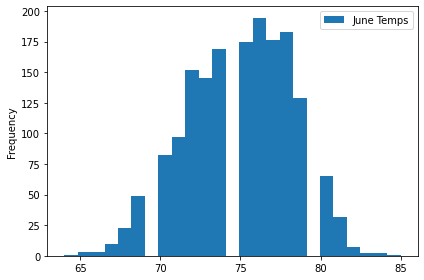

In [18]:
df_june.plot.hist(bins=25)
plt.tight_layout()

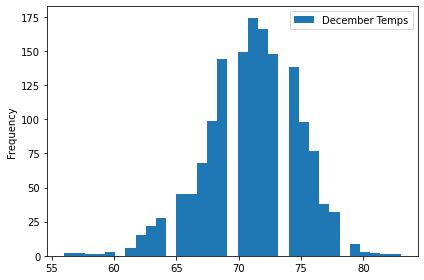

In [26]:
df_december.plot.hist(bins=33)
plt.tight_layout()